In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime as dt
import warnings  
warnings.filterwarnings('ignore')

In [2]:
sfo_data = pd.read_csv("Air_Traffic_Landings_Statistics.csv")

In [3]:
sfo_data.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000


In [4]:
# Convert "Activity Period" to datetime format and add "Year" and "Month" columns

sfo_data.loc[:,"Activity Period"] = pd.to_datetime(sfo_data.loc[:,"Activity Period"].astype(str), format="%Y%m").dt.to_period('m')

sfo_data.loc[:,"Year"] = sfo_data["Activity Period"].dt.year
sfo_data.loc[:,"Month"] = sfo_data["Activity Period"].dt.month

In [5]:
sfo_data.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,Year,Month
0,2005-07,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000,2005,7
1,2005-07,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000,2005,7
2,2005-07,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000,2005,7
3,2005-07,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000,2005,7
4,2005-07,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000,2005,7


In [6]:
sfo_data.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Landing Aircraft Type', 'Aircraft Body Type',
       'Aircraft Manufacturer', 'Aircraft Model', 'Aircraft Version',
       'Landing Count', 'Total Landed Weight', 'Year', 'Month'],
      dtype='object')

In [7]:
# data set dimentions

print("SFO Landings data set shape: ", sfo_data.shape)

SFO Landings data set shape:  (25429, 16)


In [8]:
# missing values or NAs

sfo_data.isna().sum()

Activity Period                   0
Operating Airline                 0
Operating Airline IATA Code      85
Published Airline                 0
Published Airline IATA Code      85
GEO Summary                       0
GEO Region                        0
Landing Aircraft Type             0
Aircraft Body Type                0
Aircraft Manufacturer            12
Aircraft Model                    0
Aircraft Version               1158
Landing Count                     0
Total Landed Weight               0
Year                              0
Month                             0
dtype: int64

In [9]:
# Since all of the missing values are text, we can replace NAs with string "UNK" = unknown

sfo_data = sfo_data.fillna('UNK')

In [10]:
sfo_data.isna().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Landing Aircraft Type          0
Aircraft Body Type             0
Aircraft Manufacturer          0
Aircraft Model                 0
Aircraft Version               0
Landing Count                  0
Total Landed Weight            0
Year                           0
Month                          0
dtype: int64

In [11]:
# sum of all landing counds for entire recorded period

print("The total number of Landings: ", sfo_data['Landing Count'].sum())

The total number of Landings:  2846357


In [12]:
# general statistics of landing counts

print(np.round(sfo_data['Landing Count'].describe(), 4))

count    25429.0000
mean       111.9335
std        247.7194
min          1.0000
25%         13.0000
50%         30.0000
75%         80.0000
max       2245.0000
Name: Landing Count, dtype: float64


In [13]:
# general statistics of Total Arcrafts' Weight (in millions of pounds)

total_weight_in_mil = (sfo_data['Total Landed Weight'] / 1e6)
np.round(total_weight_in_mil.describe(), 4)

count    25429.0000
mean        18.9501
std         30.3955
min          0.0068
25%          3.0550
50%          9.6000
75%         19.5300
max        275.8400
Name: Total Landed Weight, dtype: float64

In [14]:
sfo_data["Aircraft Manufacturer"].value_counts()

Boeing               15298
Airbus                6734
Bombardier            1289
McDonnell Douglas      856
Embraer                825
Beechcraft             164
Shorts                  70
Fairchild               59
DeHavilland             41
Cessna                  29
LearJet                 18
Swearingen              14
UNK                     12
Piper                    9
BAE-Avro                 6
Lockheed                 5
Name: Aircraft Manufacturer, dtype: int64

In [15]:
print(sfo_data.loc[:,"GEO Region"].unique())

['US' 'Canada' 'Asia' 'Europe' 'Australia / Oceania' 'Mexico'
 'Central America' 'Middle East' 'South America' 'Caribbean']


In [16]:
print(sfo_data.loc[:,"Landing Aircraft Type"].unique())

['Freighter' 'Passenger' 'Combi']


In [17]:
print(sfo_data.loc[:,"Aircraft Body Type"].unique())

['Narrow Body' 'Wide Body' 'Regional Jet' 'Turbo Prop']


In [18]:
# Time period of the landings data set

date_begin = sfo_data.loc[:,"Activity Period"].min()
date_end = sfo_data.loc[:,"Activity Period"].max()
num_months = (date_end.year - date_begin.year) * 12 + (date_end.month - date_begin.month)
years_range = (sfo_data.loc[:,"Year"].max()) - (sfo_data.loc[:,"Year"].min())

print("First reported date: ", str(date_begin))
print("Last reported date: ", str(date_end))
print("Time range in months:", str(num_months))
print("Time range in years:", str(years_range))

First reported date:  2005-07
Last reported date:  2020-09
Time range in months: 182
Time range in years: 15


In [19]:
sfo_data["GEO Summary"].value_counts()

International    13291
Domestic         12138
Name: GEO Summary, dtype: int64

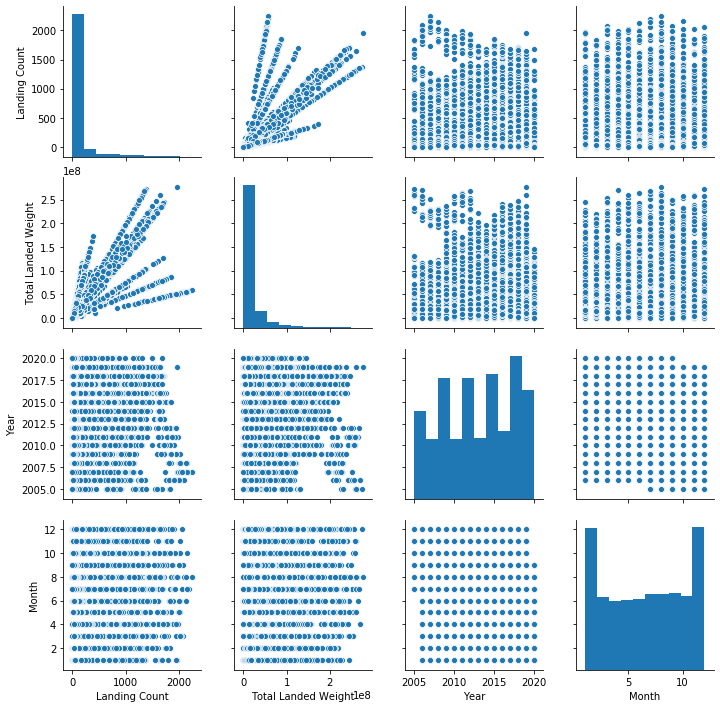

In [20]:
# pairplot of the entire data set

sns.pairplot(sfo_data)

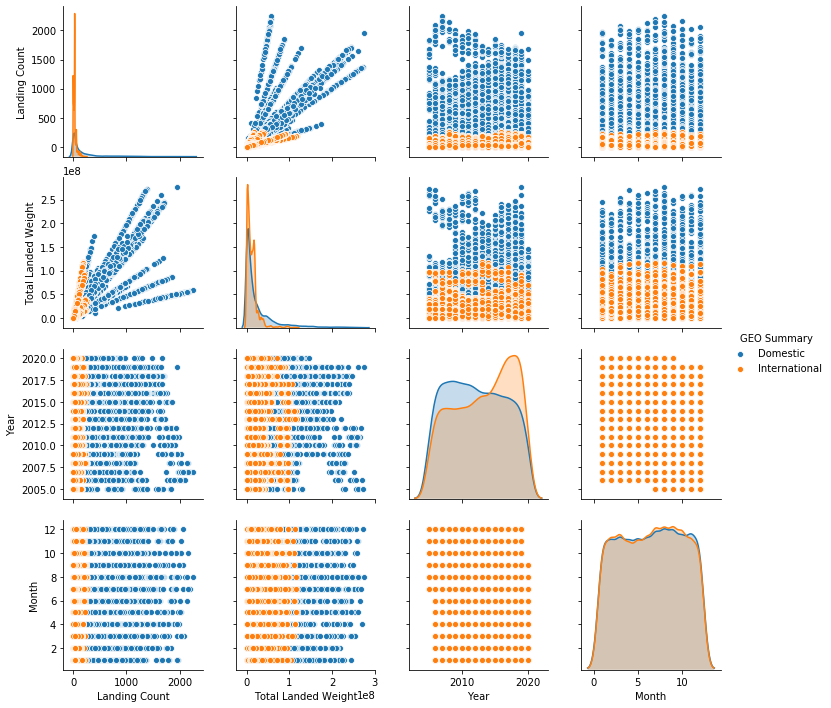

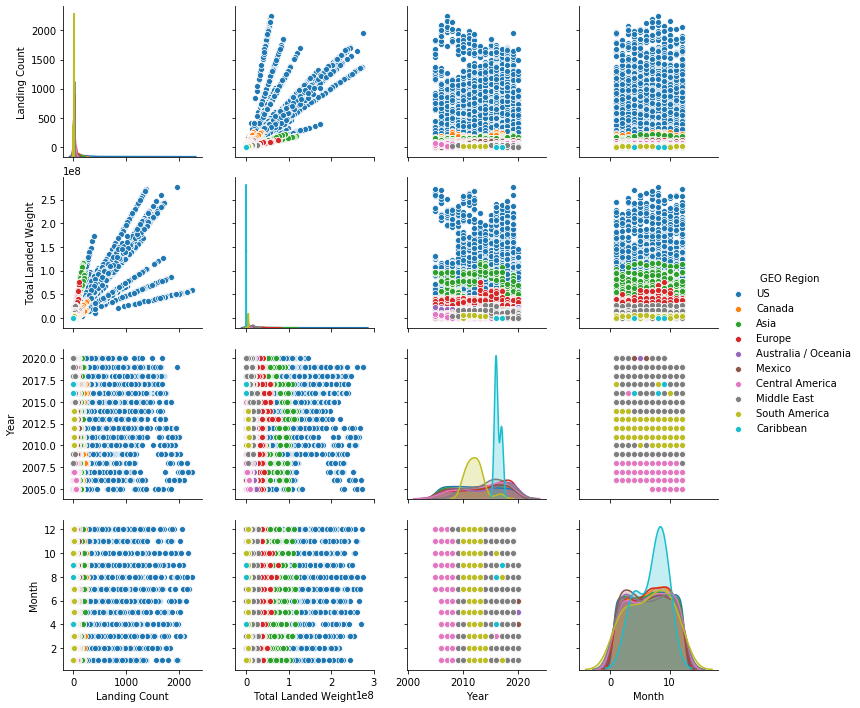

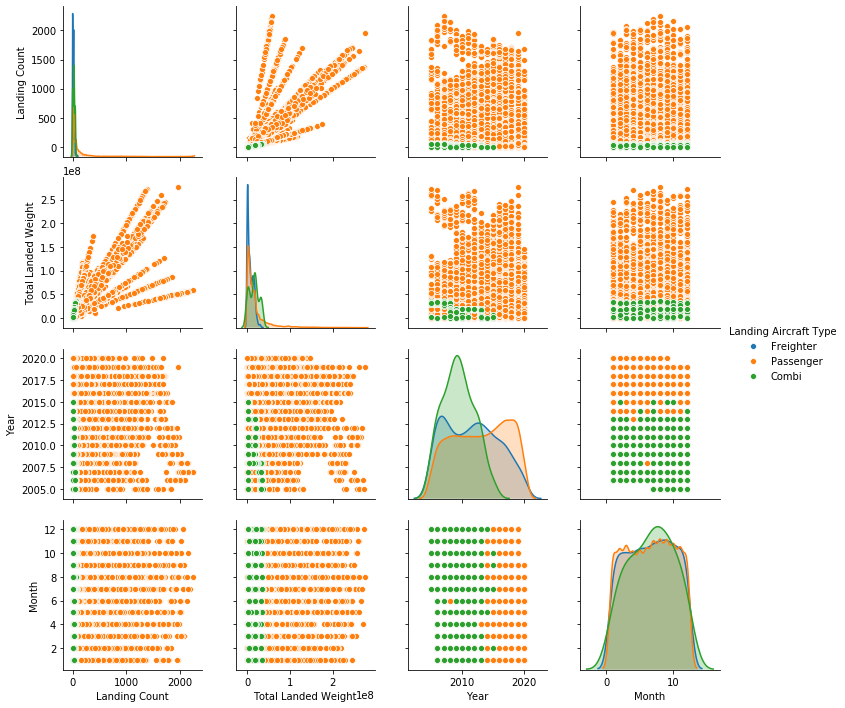

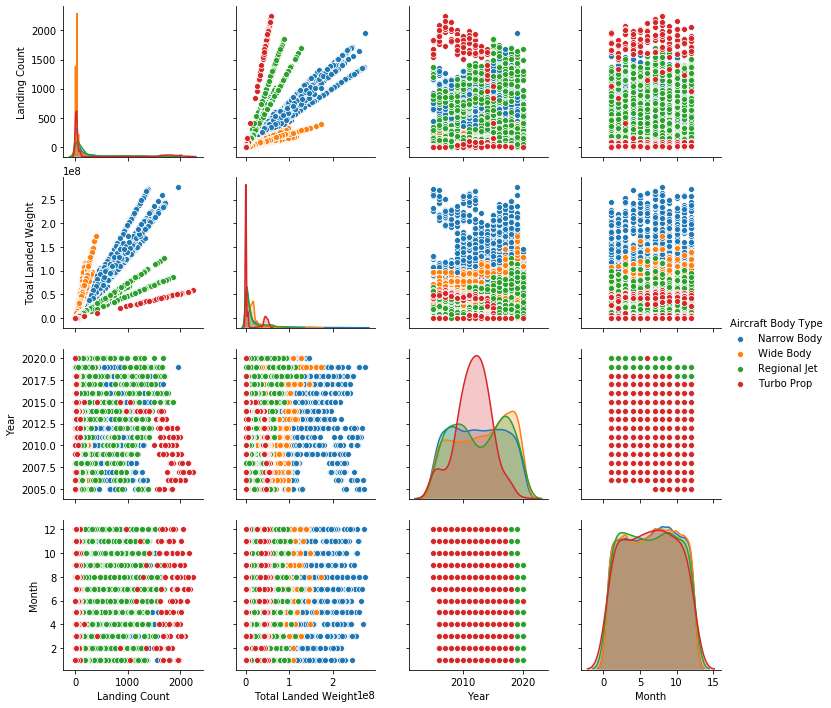

In [21]:
# pair plots by SFO data category

for i in ['GEO Summary','GEO Region','Landing Aircraft Type', 'Aircraft Body Type']:
    sns.pairplot(hue=i, data=sfo_data)


Text(0.5, 1.0, 'Total Landing Counts by Geo Summary')

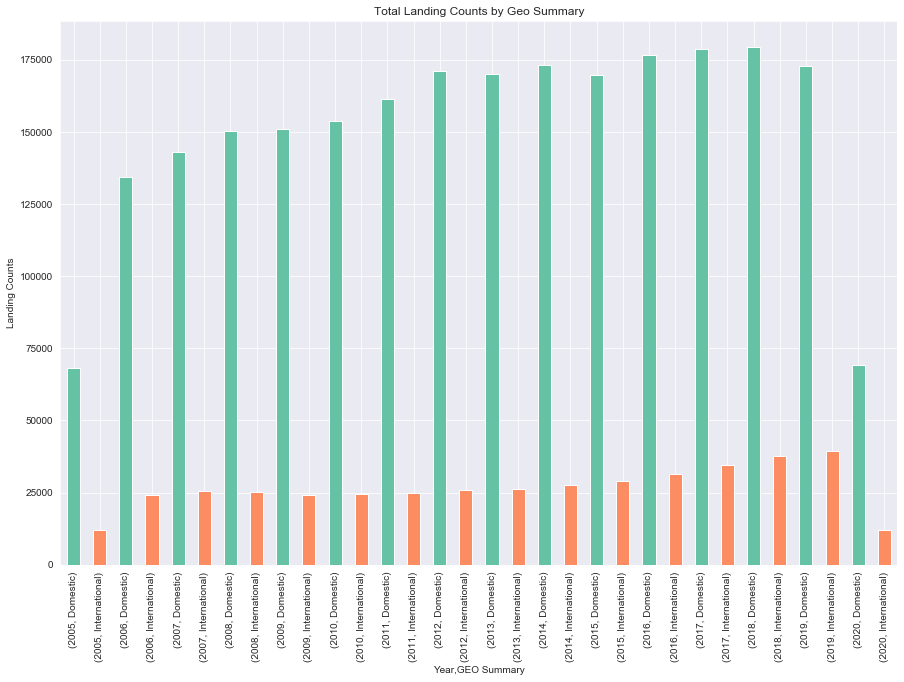

In [22]:
# Total annual Landings by GEO Summary (Domestic or International)
# Note: 2005 is partial year, data reportings from 2005-07-01. 
# Note: 2020 is partial year, data reportings till 2020-09-01.


grouped = sfo_data['Landing Count'].groupby([sfo_data['Year'], sfo_data['GEO Summary']]).sum()

# grouped = sfo_data.groupby(['Year'])[['Landing Count','GEO Summary']].sum()
# print(grouped)

sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (15, 10)})

cmap = sns.color_palette("Set2", n_colors=2)
grouped.plot(kind='bar', stacked=False, figsize=(15,10), colors=cmap, label="Landing Counts")
# plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.5, fontsize="large")
plt.ylabel("Landing Counts")
plt.title("Total Landing Counts by Geo Summary", fontsize='large')

In [23]:
# There were more than 39,000 International landings and departures for the entire year of 2019.
# And for the first three Quarters of 2020 there were only almost 12,000 International landings and departures.
# We will investigate this trend by monthly further down


print("Total number of Landings in 2019 by", grouped[2019])
print("Total number of Landings in 2020 by", grouped[2020])

Total number of Landings in 2019 by GEO Summary
Domestic         172802
International     39396
Name: Landing Count, dtype: int64
Total number of Landings in 2020 by GEO Summary
Domestic         69189
International    11921
Name: Landing Count, dtype: int64


In [24]:
# sfo_data["GEO Summary"] = pd.Categorical(sfo_data["GEO Summary"])
# geo_summary = sfo_data["GEO Summary"].cat.codes
# sfo_data["Year"] = pd.Categorical(sfo_data["Year"])


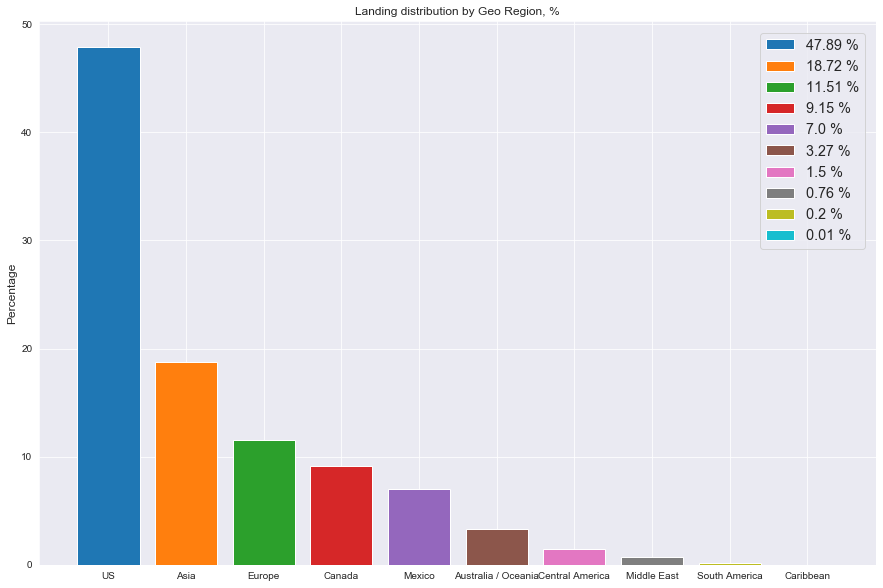

In [24]:
# Share of each Geo Region in total Landings

geo_regions = sfo_data['GEO Region'].value_counts().index.tolist()

for p in range(len(geo_regions)):
    geo_vals = list(pd.value_counts(sfo_data['GEO Region']))
    percentile = np.round(((geo_vals[p]/sum(geo_vals))*100),2)
    plt.bar(geo_regions[p], percentile, label="{} %".format(percentile))
    plt.ylabel('Percentage', fontsize='large')
    plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.8, fontsize="x-large")
    plt.title("Landing distribution by Geo Region, %", fontsize='large')

Text(0.5, 1.0, '"Distribution of Total Landing Weight, in mil. of lb"')

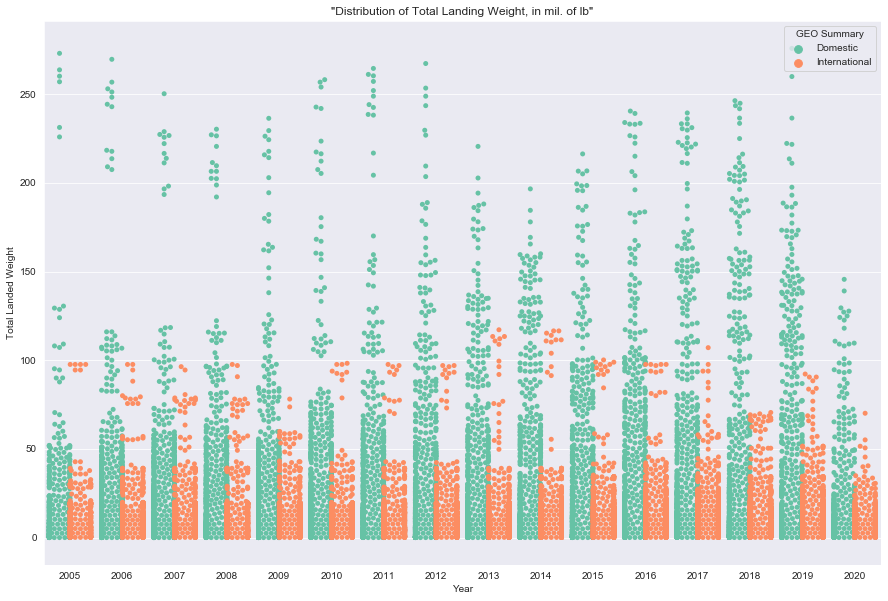

In [25]:
# Annual total landing weight by Domestic and International category (in millions of pounds)

sns.axes_style("darkgrid")
sns.swarmplot(x="Year", 
              y=total_weight_in_mil, 
              hue="GEO Summary", 
              data=sfo_data, 
              palette="Set2", 
              dodge=True).set_title('"Distribution of Total Landing Weight, in mil. of lb"')

In [26]:
# Number of Landing Aircraft Types for the entire reported period

print(sfo_data.loc[:,"Landing Aircraft Type"].value_counts())

Passenger    22403
Freighter     2884
Combi          142
Name: Landing Aircraft Type, dtype: int64


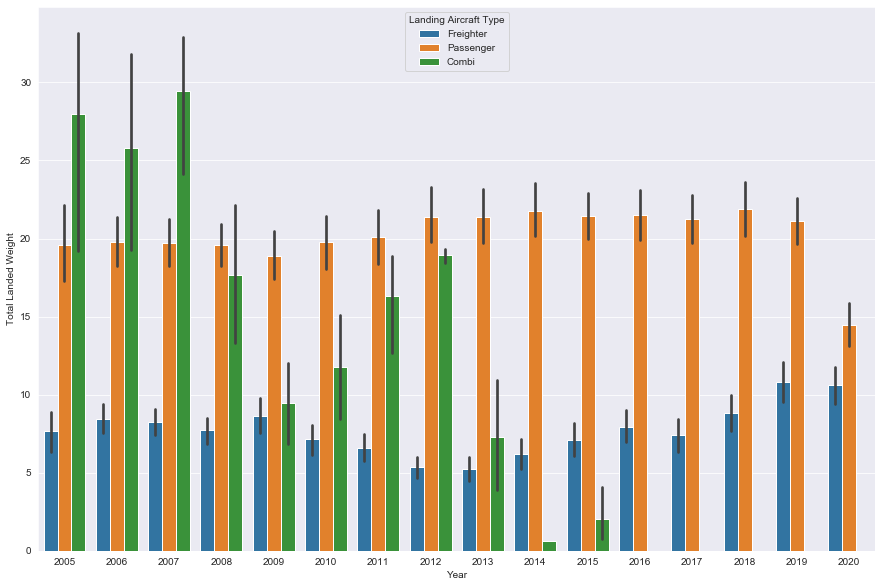

In [27]:
# Annual total weight of different Aircraft Types

sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (15, 10)})


sns.barplot(x="Year", y=total_weight_in_mil, hue="Landing Aircraft Type", data=sfo_data, dodge=True)

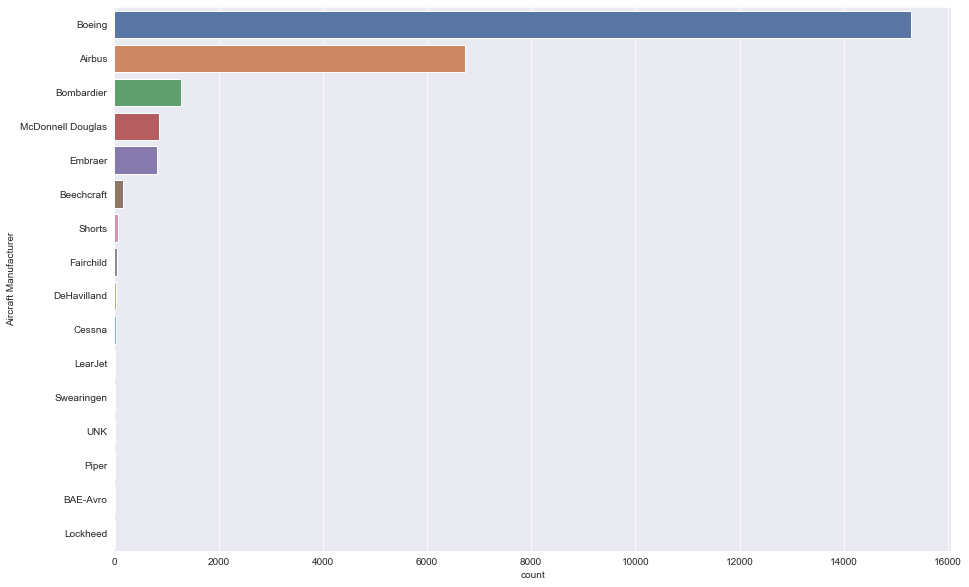

In [28]:
# sns.set_theme("darkgrid")
# sns.set_context("paper")
# st = sns.axes_style("darkgrid")
# air_man = sfo_data["Aircraft Manufacturer"].value_counts()

grouped_2019 = sfo_data["Aircraft Manufacturer"].groupby([sfo_data['Year'] == 2019]).value_counts()
grouped_2020 = sfo_data["Aircraft Manufacturer"].groupby([sfo_data['Year'] == 2020]).value_counts()
# print(grouped_2019,"/n", grouped_2020)

# cmap = sns.color_palette("Blues", n_colors=2)
# grouped.plot(kind='bar', stacked=False, figsize=(15,10), colors=cmap, label="Landing Counts")
# plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.5, fontsize="large")

sns.axes_style("darkgrid")
landings = sns.countplot(data=sfo_data, y="Aircraft Manufacturer", 
                         order = sfo_data['Aircraft Manufacturer'].value_counts().index, 
                         orient="h", 
                         palette="deep")
# landings = sns.countplot(y=grouped_2019, orient="h", palette="deep")

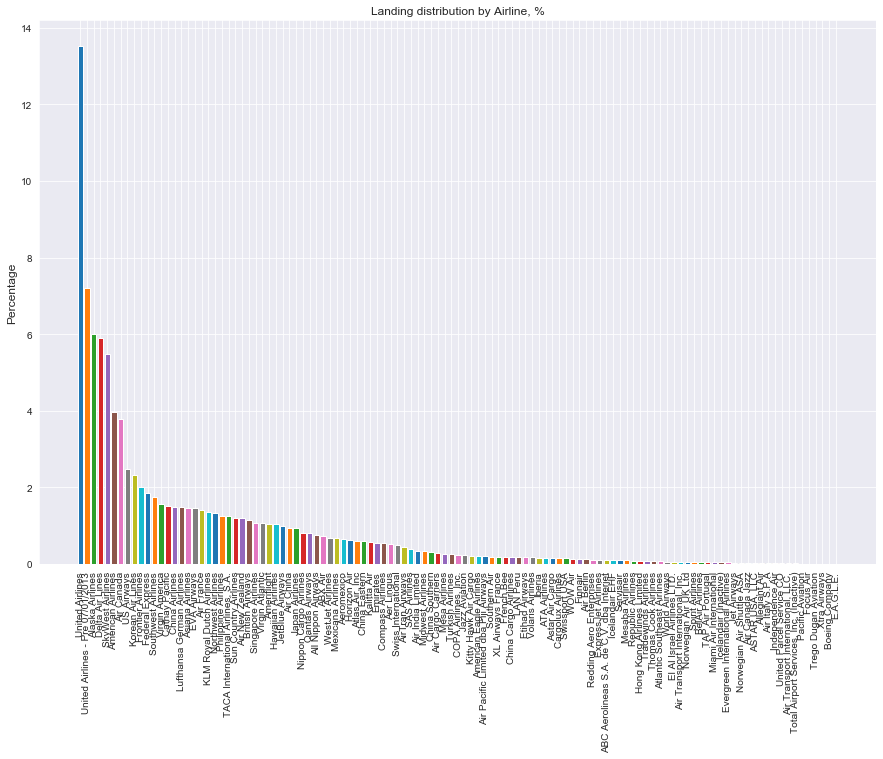

In [29]:
# Share of each Operating Airline in total Landings

airlines = sfo_data['Operating Airline'].value_counts().index.tolist()

for p in range(len(airlines)):
    airline_vals = list(pd.value_counts(sfo_data['Operating Airline']))
    percentile = np.round(((airline_vals[p]/sum(airline_vals))*100),2)
    plt.bar(airlines[p], percentile, label="{} %".format(percentile))
    plt.ylabel('Percentage', fontsize='large')
    plt.figsize=(35,10)
    # plt.legend(bbox_to_anchor=(1, 1), loc="upper left", borderaxespad=0.1, fontsize="small")
    plt.xticks(rotation=90)
    # plt.text(p, y=percentile, s=str(percentile), color='black', ha='center', va='top', rotation="vertical")
    plt.margins(tight=False)
    plt.title("Landing distribution by Airline, %", fontsize='large')

In [30]:
# top ten biggest Airlines at SFO

top_airlines = sfo_data['Operating Airline'].value_counts()
print(top_airlines[:10])

United Airlines                     3437
United Airlines - Pre 07/01/2013    1834
Alaska Airlines                     1529
Delta Air Lines                     1497
SkyWest Airlines                    1396
American Airlines                   1010
Air Canada                           963
US Airways                           630
Korean Air Lines                     593
Frontier Airlines                    508
Name: Operating Airline, dtype: int64


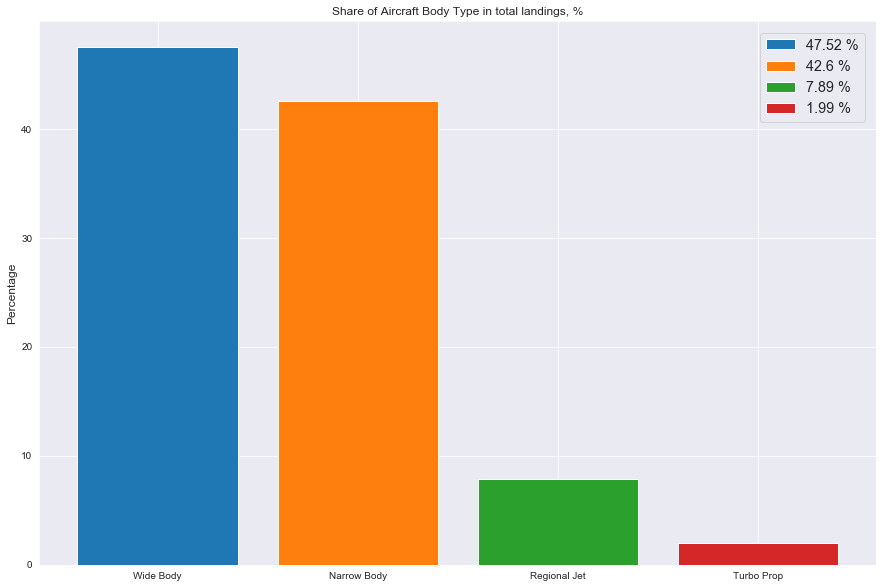

In [31]:
# Share of Aircraft Body Type in total Landings

airlines_body = sfo_data["Aircraft Body Type"].value_counts().index.tolist()

for p in range(len(airlines_body)):
    airline_vals = list(pd.value_counts(sfo_data["Aircraft Body Type"]))
    percentile = np.round(((airline_vals[p]/sum(airline_vals))*100),2)
    plt.bar(airlines_body[p], percentile, label="{} %".format(percentile))
    plt.ylabel('Percentage', fontsize='large')
    plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.8, fontsize="x-large")
    plt.title("Share of Aircraft Body Type in total landings, %", fontsize='large')

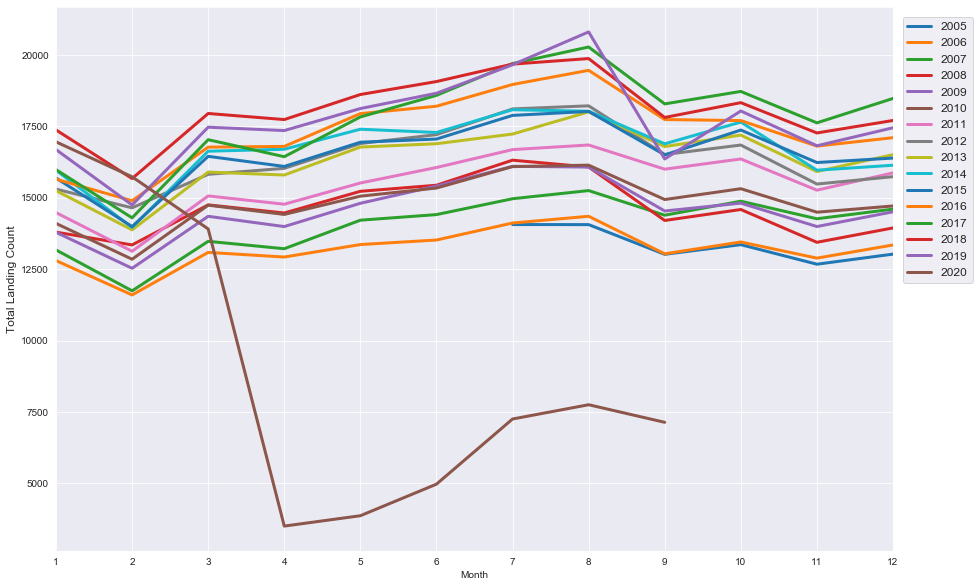

In [32]:
# Annual Landings by month
# We can clearly see the 2020 declining trend due to Covid-19 pandemic

month_pivot = pd.pivot_table(sfo_data, index='Month', columns = 'Year', values = 'Landing Count', aggfunc=np.sum)
month_pivot.plot(figsize=(15,10), linewidth=3, xticks=month_pivot.index)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", borderaxespad=0.8, fontsize="large")
plt.ylabel('Total Landing Count', fontsize='large')
plt.show()

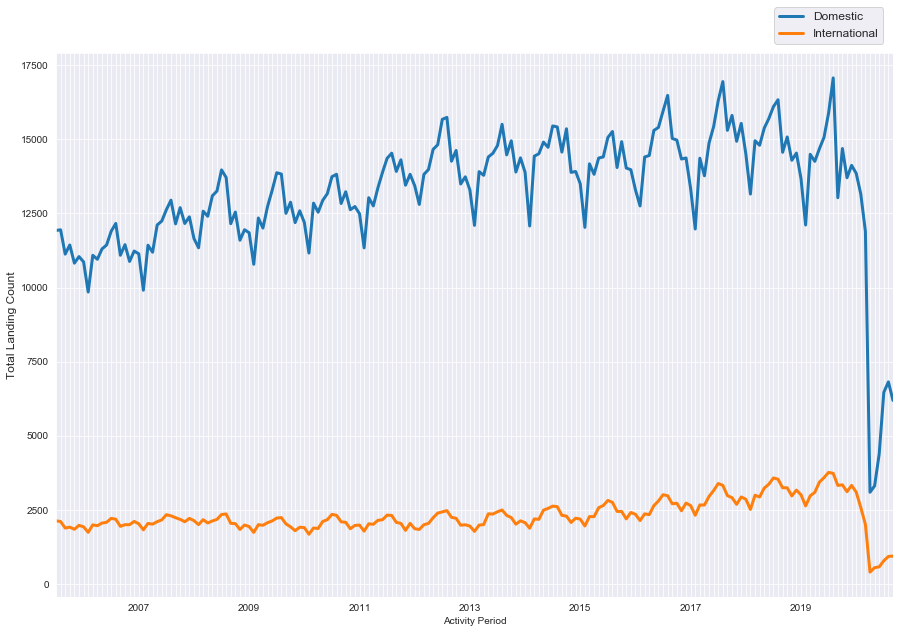

In [33]:
# Annual Landings by Domestic or International


geo_pivot = pd.pivot_table(sfo_data, 
                           index='Activity Period', 
                           columns = 'GEO Summary', 
                           values = 'Landing Count', 
                           aggfunc=np.sum)
geo_pivot.plot(figsize=(15,10), linewidth=3, xticks=geo_pivot.index)
plt.legend(bbox_to_anchor=(1, 1), loc="lower right", borderaxespad=0.8, fontsize="large")
plt.ylabel('Total Landing Count', fontsize='large')
plt.show()

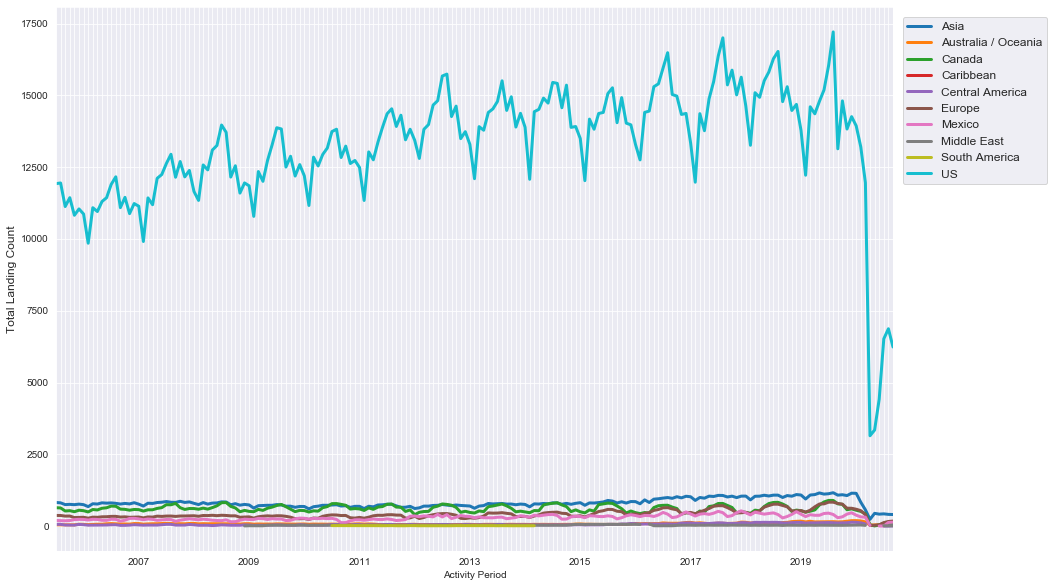

In [34]:
# Annual Landings by GEO Region


region_pivot = pd.pivot_table(sfo_data, index='Activity Period', columns = 'GEO Region', values = 'Landing Count', aggfunc=np.sum)
region_pivot.plot(figsize=(15,10), linewidth=3, xticks=region_pivot.index)
plt.legend(bbox_to_anchor=(1, 1), loc="bottom right", borderaxespad=0.8, fontsize="large")
plt.ylabel('Total Landing Count', fontsize='large')
plt.show()

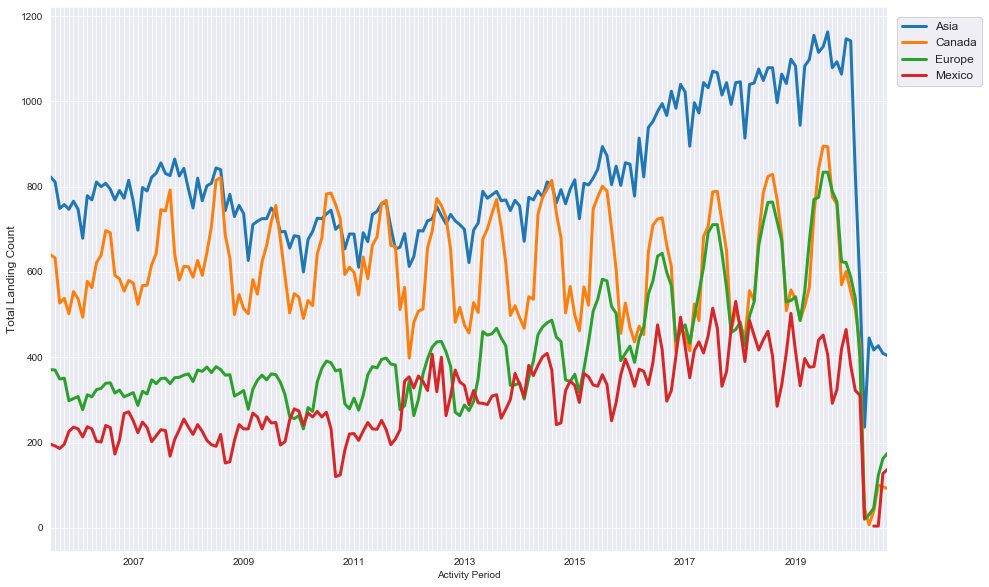

In [35]:
# Annual Landings by top four Geo Regions, not including USA


region_pivot = pd.pivot_table(sfo_data, 
                              index='Activity Period', 
                              columns = 'GEO Region', 
                              values = 'Landing Count', 
                              aggfunc=np.sum)
region_pivot = region_pivot[['Asia', 'Canada' ,'Europe' , 'Mexico']]
region_pivot.plot(figsize=(15,10), linewidth=3, xticks=region_pivot.index)
plt.legend(bbox_to_anchor=(1, 1), loc="bottom right", borderaxespad=0.8, fontsize="large")
plt.ylabel('Total Landing Count', fontsize='large')
plt.show()

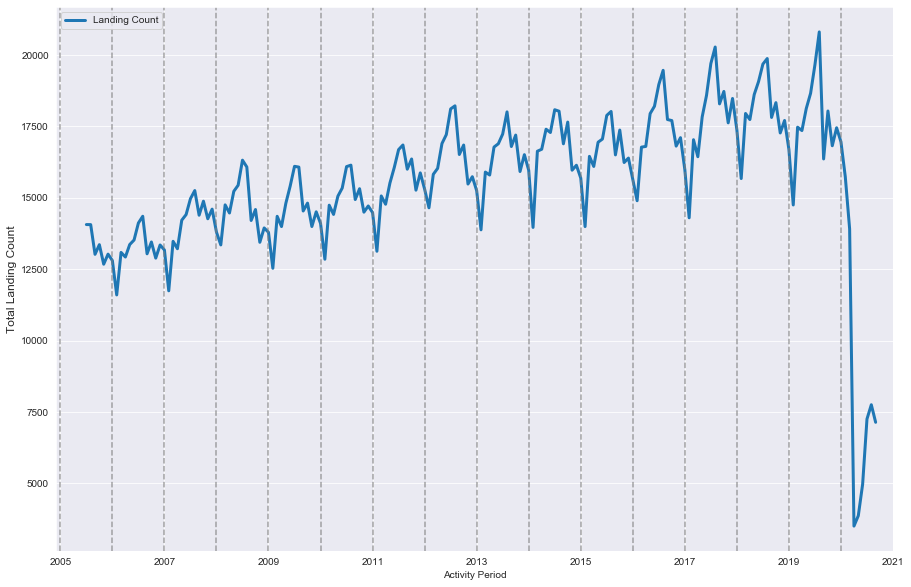

In [36]:
# total landings for the entire activity period

grouped1 = sfo_data['Landing Count'].groupby(sfo_data['Activity Period']).sum().to_frame()

grouped1.plot(figsize=(15,10), linewidth=3)
plt.ylabel('Total Landing Count', fontsize='large')
plt.xlim(["2004-12","2021-01"]) # set x-axis limits for better visualization of start and end years

# mark beginning of each year with dotted line
years = grouped1.index.year.unique()

for year in years:
    plt.axvline(x=str(year) + "-01", ls = "--", color = "gray", alpha=0.7)

## LSTM to predict total Landings


In [37]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [38]:
# set random seed for reproducibility

np.random.seed(2)

In [39]:
# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(grouped1)

In [40]:
# split data into train (80%) and test (20%) data sets

train_size = int(len(dataset) * 0.8) # 146 of 183 observations 
# train_size = 174 # all observations with the exception of last 9 month of 2020
test_size = len(dataset) - train_size # 37 of 183 observations 
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

146 37


In [41]:
# convert an array of values into a dataset matrix
# create a dataset where X is the number of landings at a given time (t) 
# and Y is the number of landings at the next time (t + 1)

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
# reshape into X=t and Y=t+1

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [43]:
# reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# with time stamps

# trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
# testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [44]:
# create and fit the LSTM network

# LSTM has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer 
# that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. 

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1)) # 1 output layer
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# history = model.fit(trainX, trainY, validation_data=(testX,testY), epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.4585
Epoch 2/100
 - 0s - loss: 0.2356
Epoch 3/100
 - 0s - loss: 0.0808
Epoch 4/100
 - 0s - loss: 0.0153
Epoch 5/100
 - 0s - loss: 0.0082
Epoch 6/100
 - 0s - loss: 0.0079
Epoch 7/100
 - 0s - loss: 0.0079
Epoch 8/100
 - 0s - loss: 0.0078
Epoch 9/100
 - 0s - loss: 0.0077
Epoch 10/100
 - 0s - loss: 0.0076
Epoch 11/100
 - 0s - loss: 0.0075
Epoch 12/100
 - 0s - loss: 0.0074
Epoch 13/100
 - 0s - loss: 0.0073
Epoch 14/100
 - 0s - loss: 0.0073
Epoch 15/100
 - 0s - loss: 0.0071
Epoch 16/100
 - 0s - loss: 0.0071
Epoch 17/100
 - 0s - loss: 0.0070
Epoch 18/100
 - 0s - loss: 0.0068
Epoch 19/100
 - 0s - loss: 0.0067
Epoch 20/100
 - 0s - loss: 0.0065
Epoch 21/100
 - 0s - loss: 0.0065
Epoch 22/100
 - 1s - loss: 0.0064
Epoch 23/100
 - 0s - loss: 0.0063
Epoch 24/100
 - 0s - loss: 0.0063
Epoch 25/100
 - 0s - loss: 0.0062
Epoch 26/100
 - 1s - loss: 0.0060
Epoch 27/100
 - 0s - loss: 0.0060
Epoch 28/100
 - 0s - loss: 0.0058
Epoch 29/100
 - 1s - loss: 0.0058
Epoch 30/100
 - 0s - lo

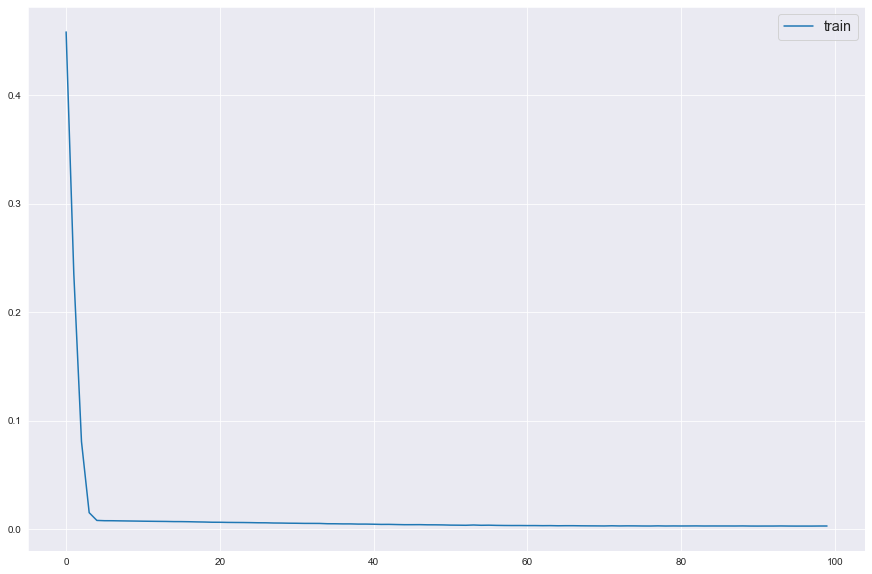

In [45]:
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize="x-large")
plt.show()

In [46]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [47]:
# invert predictions (to ensure that performance is reported in the same units as the original data)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 937.86 RMSE
Test Score: 2339.76 RMSE


In [48]:
# shift train predictions for plotting

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

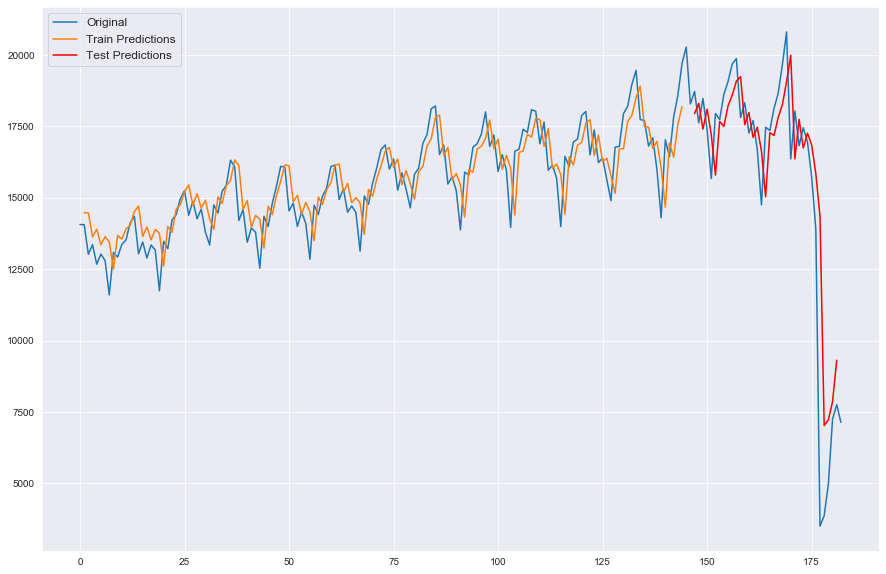

In [49]:
# plot actual/original data and predictions

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot, color = "red")
plt.legend(labels=('Original', 'Train Predictions', 'Test Predictions'), loc='best', fontsize="large")
plt.show()